In [16]:
import pandas as pd
import glob
import os
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
#dropbox_dir = "C:/Users/cocoy/Dropbox (Palmer Lab)"
dropbox_dir = "/Users/kendraziegler/Dropbox (Palmer Lab)"

meta_dir = dropbox_dir + "/Suzanne_Mitchell_U01/Data-locomotor"

In [21]:
cohorts_dir = ['Shipment1_locomotor','Shipment2_locomotor','Shipment3_locomotor','Shipment4_locomotor',
              'Shipment5_locomotor','Shipment6_locomotor','ShipR_locomotor']
file_name = ['UCSD_Locomotor_FecalBoli_Ship1.xlsx','UCSD_Locomotor_FecalBoli_Ship2.xlsx',
              'UCSD_Locomotor_FecalBoli_Ship3.xlsx','UCSD_Locomotor_FecaBoli_Ship4.xlsx',
              'UCSD_Locomotor_FecalBoli_Ship5.xlsx','UCSD_Locomotor_FecalBoli_Ship6.xlsx',
            'UCSD_Locomotor_FecalBoli_ShipR.xlsx']
dir_dict = {cohorts_dir[i]: file_name[i] for i in range(len(cohorts_dir))}
df_fecal = pd.DataFrame()
for cohort_dir,file_name in dir_dict.items():
        #for cohort in cohort_list:
        file = meta_dir + "/" + cohort_dir + "/" + file_name
        df_fecal = df_fecal.append(pd.read_excel(file), ignore_index=True)
df_fecal
#df_fecal.columns

,Box,Change,Date,Date.1,Fecal Boli,Fecal Boli,Fecal Boli.1,Sex,Subj #,Subj #,Time In,Time In,Time In.1
0,1,-1.0,2018-12-20,2018-12-21,5,4.0,NaN,M,NaN,46058.0,12:26:00,13:09:00,NaN
1,1,-2.0,2018-12-20,2018-12-21,8,6.0,NaN,M,NaN,46067.0,12:26:00,13:09:00,NaN
2,2,-4.0,2018-12-20,2018-12-21,11,7.0,NaN,M,NaN,46282.0,12:28:00,13:10:00,NaN
3,2,1.0,2018-12-20,2018-12-21,8,9.0,NaN,M,NaN,45924.0,12:27:00,13:10:00,NaN
4,3,1.0,2018-12-20,2018-12-21,5,6.0,NaN,M,NaN,46276.0,12:51:00,13:33:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,21,0.0,2020-10-12,2020-10-13,0,NaN,0.0,M,24750.0,NaN,12:42:00,NaN,12:43:00
632,23,2.0,2020-10-12,2020-10-13,0,NaN,2.0,M,24693.0,NaN,13:04:00,NaN,13:02:00
633,23,-1.0,2020-10-12,2020-10-13,3,NaN,2.0,M,24682.0,NaN,13:05:00,NaN,13:03:00
634,24,2.0,2020-10-12,2020-10-13,4,NaN,6.0,M,24669.0,NaN,13:05:00,NaN,13:03:00


In [23]:
#df_excel.rename(columns={df_excel.columns[1]:'last_5_rfid','Box':'box','Sex':'sex','Date':'date_1',
#                         'Time In':'time_in_1','Fecal Boli':'fecal_boli_1','Date.1':'date_2','Time In':'time_in_2',
#                         'Fecal Boli':'fecal_boli_2','Change':'change','Fecal Boli.1':'fecal_boli_3',
#                         'Subj #':'subject_remove','Time In.1':'time_in_3'})
#df_excel.rename(columns={'Subj #':'last_5_rfid','Time In':'time_in_2','Fecal Boli':'fecal_boli_2'})
df_fecal.columns = ['box', 'change', 'date_1', 'date_2', 'fecal_boli_1', 'fecal_boli_2',
       'fecal_boli_3', 'sex', 'last_5', 'subject_remove', 'time_in_1', 'time_in_2',
       'time_in_3']
df_fecal

,box,change,date_1,date_2,fecal_boli_1,fecal_boli_2,fecal_boli_3,sex,last_5,subject_remove,time_in_1,time_in_2,time_in_3
0,1,-1.0,2018-12-20,2018-12-21,5,4.0,NaN,M,NaN,46058.0,12:26:00,13:09:00,NaN
1,1,-2.0,2018-12-20,2018-12-21,8,6.0,NaN,M,NaN,46067.0,12:26:00,13:09:00,NaN
2,2,-4.0,2018-12-20,2018-12-21,11,7.0,NaN,M,NaN,46282.0,12:28:00,13:10:00,NaN
3,2,1.0,2018-12-20,2018-12-21,8,9.0,NaN,M,NaN,45924.0,12:27:00,13:10:00,NaN
4,3,1.0,2018-12-20,2018-12-21,5,6.0,NaN,M,NaN,46276.0,12:51:00,13:33:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,21,0.0,2020-10-12,2020-10-13,0,NaN,0.0,M,24750.0,NaN,12:42:00,NaN,12:43:00
632,23,2.0,2020-10-12,2020-10-13,0,NaN,2.0,M,24693.0,NaN,13:04:00,NaN,13:02:00
633,23,-1.0,2020-10-12,2020-10-13,3,NaN,2.0,M,24682.0,NaN,13:05:00,NaN,13:03:00
634,24,2.0,2020-10-12,2020-10-13,4,NaN,6.0,M,24669.0,NaN,13:05:00,NaN,13:03:00


In [24]:
#df_excel['Subj #'].value_counts()

In [25]:
#combine columns
def merge_columns():
    df_fecal['last_5'].update(df_fecal.pop('subject_remove'))
    df_fecal['time_in_2'].update(df_fecal.pop('time_in_3'))
    df_fecal['fecal_boli_2'].update(df_fecal.pop('fecal_boli_3'))

merge_columns()
df_fecal

,box,change,date_1,date_2,fecal_boli_1,fecal_boli_2,sex,last_5,time_in_1,time_in_2
0,1,-1.0,2018-12-20,2018-12-21,5,4.0,M,46058.0,12:26:00,13:09:00
1,1,-2.0,2018-12-20,2018-12-21,8,6.0,M,46067.0,12:26:00,13:09:00
2,2,-4.0,2018-12-20,2018-12-21,11,7.0,M,46282.0,12:28:00,13:10:00
3,2,1.0,2018-12-20,2018-12-21,8,9.0,M,45924.0,12:27:00,13:10:00
4,3,1.0,2018-12-20,2018-12-21,5,6.0,M,46276.0,12:51:00,13:33:00
...,...,...,...,...,...,...,...,...,...,...
631,21,0.0,2020-10-12,2020-10-13,0,0.0,M,24750.0,12:42:00,12:43:00
632,23,2.0,2020-10-12,2020-10-13,0,2.0,M,24693.0,13:04:00,13:02:00
633,23,-1.0,2020-10-12,2020-10-13,3,2.0,M,24682.0,13:05:00,13:03:00
634,24,2.0,2020-10-12,2020-10-13,4,6.0,M,24669.0,13:05:00,13:03:00


In [26]:
#load in wfu master to get full id and cohorts
#dropbox_dir = r'C:/Users/cocoy/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01'
dropbox_dir = r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01'

df_wfu = pd.read_csv(dropbox_dir + '/wfu_master.csv')
df_wfu
#Take the cohort value from the wfu and map it to the locomotor df
def locomotor_cohort(df_fecal):
    #create an empty column for cohort for the locomotor df
    df_fecal["cohort"] = np.nan

    #loop through each rfid in master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the cohort of the rfid
        b = df_wfu.iloc[a]['cohort']
        #find all the indeces that have that rfid in locomotor df
        c = df_fecal.loc[df_fecal['last_5'] == i].index.tolist()
        #loop through each index
        for index in c:
            #set the cohort value at that index equal to the cohort from wfu_master
            df_fecal.loc[index,'cohort'] = b

        
locomotor_cohort(df_fecal)
df_fecal

,box,change,date_1,date_2,fecal_boli_1,fecal_boli_2,sex,last_5,time_in_1,time_in_2,cohort
0,1,-1.0,2018-12-20,2018-12-21,5,4.0,M,46058.0,12:26:00,13:09:00,C01
1,1,-2.0,2018-12-20,2018-12-21,8,6.0,M,46067.0,12:26:00,13:09:00,C01
2,2,-4.0,2018-12-20,2018-12-21,11,7.0,M,46282.0,12:28:00,13:10:00,C01
3,2,1.0,2018-12-20,2018-12-21,8,9.0,M,45924.0,12:27:00,13:10:00,C01
4,3,1.0,2018-12-20,2018-12-21,5,6.0,M,46276.0,12:51:00,13:33:00,C01
...,...,...,...,...,...,...,...,...,...,...,...
631,21,0.0,2020-10-12,2020-10-13,0,0.0,M,24750.0,12:42:00,12:43:00,C07
632,23,2.0,2020-10-12,2020-10-13,0,2.0,M,24693.0,13:04:00,13:02:00,C07
633,23,-1.0,2020-10-12,2020-10-13,3,2.0,M,24682.0,13:05:00,13:03:00,C07
634,24,2.0,2020-10-12,2020-10-13,4,6.0,M,24669.0,13:05:00,13:03:00,C07


In [27]:
def correcting_rfid():
    df_fecal["rfid"] = np.nan
    df_fecal['last_5'] = df_fecal['last_5'].astype(str)
    #change rfid to unclude all 15 digits
    #C01-C04 9330003200 else 9330003201
    cohort_list_1 = ['C01','C02','C03','C04']
    cohort_list_2 = ['C05','C06','C07']
    for i in cohort_list_1:
        df_fecal.loc[(df_fecal.cohort == i),'rfid']= '9330003200' + df_fecal['last_5'].astype(str)
    for i in cohort_list_2:
        df_fecal.loc[(df_fecal.cohort == i),'rfid']= '9330003201' + df_fecal['last_5'].astype(str)
    df_fecal['rfid'] = df_fecal['rfid'].astype(str)
correcting_rfid()
df_fecal

,box,change,date_1,date_2,fecal_boli_1,fecal_boli_2,sex,last_5,time_in_1,time_in_2,cohort,rfid
0,1,-1.0,2018-12-20,2018-12-21,5,4.0,M,46058.0,12:26:00,13:09:00,C01,933000320046058.0
1,1,-2.0,2018-12-20,2018-12-21,8,6.0,M,46067.0,12:26:00,13:09:00,C01,933000320046067.0
2,2,-4.0,2018-12-20,2018-12-21,11,7.0,M,46282.0,12:28:00,13:10:00,C01,933000320046282.0
3,2,1.0,2018-12-20,2018-12-21,8,9.0,M,45924.0,12:27:00,13:10:00,C01,933000320045924.0
4,3,1.0,2018-12-20,2018-12-21,5,6.0,M,46276.0,12:51:00,13:33:00,C01,933000320046276.0
...,...,...,...,...,...,...,...,...,...,...,...,...
631,21,0.0,2020-10-12,2020-10-13,0,0.0,M,24750.0,12:42:00,12:43:00,C07,933000320124750.0
632,23,2.0,2020-10-12,2020-10-13,0,2.0,M,24693.0,13:04:00,13:02:00,C07,933000320124693.0
633,23,-1.0,2020-10-12,2020-10-13,3,2.0,M,24682.0,13:05:00,13:03:00,C07,933000320124682.0
634,24,2.0,2020-10-12,2020-10-13,4,6.0,M,24669.0,13:05:00,13:03:00,C07,933000320124669.0


In [28]:
list(df_fecal.columns.values)

['box',
 'change',
 'date_1',
 'date_2',
 'fecal_boli_1',
 'fecal_boli_2',
 'sex',
 'last_5',
 'time_in_1',
 'time_in_2',
 'cohort',
 'rfid']

In [29]:
#reorder columns
df_fecal = df_fecal[['rfid','last_5', 'cohort','box','sex','date_1','time_in_1','fecal_boli_1',
                     'date_2','time_in_2','fecal_boli_2','change']]
df_fecal

,rfid,last_5,cohort,box,sex,date_1,time_in_1,fecal_boli_1,date_2,time_in_2,fecal_boli_2,change
0,933000320046058.0,46058.0,C01,1,M,2018-12-20,12:26:00,5,2018-12-21,13:09:00,4.0,-1.0
1,933000320046067.0,46067.0,C01,1,M,2018-12-20,12:26:00,8,2018-12-21,13:09:00,6.0,-2.0
2,933000320046282.0,46282.0,C01,2,M,2018-12-20,12:28:00,11,2018-12-21,13:10:00,7.0,-4.0
3,933000320045924.0,45924.0,C01,2,M,2018-12-20,12:27:00,8,2018-12-21,13:10:00,9.0,1.0
4,933000320046276.0,46276.0,C01,3,M,2018-12-20,12:51:00,5,2018-12-21,13:33:00,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
631,933000320124750.0,24750.0,C07,21,M,2020-10-12,12:42:00,0,2020-10-13,12:43:00,0.0,0.0
632,933000320124693.0,24693.0,C07,23,M,2020-10-12,13:04:00,0,2020-10-13,13:02:00,2.0,2.0
633,933000320124682.0,24682.0,C07,23,M,2020-10-12,13:05:00,3,2020-10-13,13:03:00,2.0,-1.0
634,933000320124669.0,24669.0,C07,24,M,2020-10-12,13:05:00,4,2020-10-13,13:03:00,6.0,2.0


In [32]:
df_fecal.sex.value_counts()

M    218
F    208
Name: sex, dtype: int64

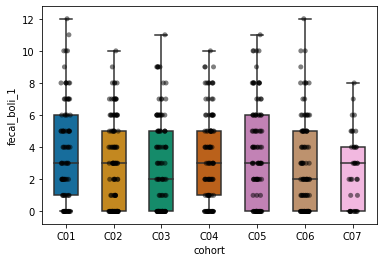

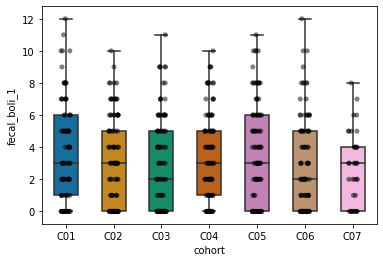

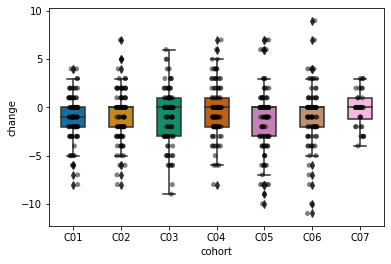

In [31]:
graph_columns = ['fecal_boli_1','fecal_boli_1','change']
for col in graph_columns:
    sns.boxplot(y = col, x ='cohort', 
                     data = df_fecal, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='cohort',
                        data=df_fecal, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()